In [34]:
import pandas as pd

In [35]:
df=pd.read_csv("UCI_Heart_Disease_Dataset_Combined.csv")

In [36]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [37]:
df.shape

(2943, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [39]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease'],
      dtype='object')

In [40]:
df=df.drop(['RestingECG', 'Oldpeak'],axis=1)

In [41]:
# df=df.drop(['FastingBS'],axis=1)

df.head()

In [42]:
duplicate_rows_df = df[df.duplicated()]
print("\nDuplicate Rows except the first occurrence based on all columns are:")
print(duplicate_rows_df)


Duplicate Rows except the first occurrence based on all columns are:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
595    60    1              3        130          186          1    140   
1933   34    0              1        118          210          0    192   
1949   50    0              1        120          244          0    162   
1961   46    1              0        120          249          0    144   
1973   55    1              0        140          217          0    111   
...   ...  ...            ...        ...          ...        ...    ...   
2938   59    1              1        140          221          0    164   
2939   60    1              0        125          258          0    141   
2940   47    1              0        110          275          0    118   
2941   50    0              0        110          254          0    159   
2942   54    1              0        120          188          0    113   

      ExerciseAngina  HeartDi

In [43]:
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df)


DataFrame after removing duplicates:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0      40    1              1        140          289          0    172   
1      49    0              2        160          180          0    156   
2      37    1              1        130          283          0     98   
3      48    0              3        138          214          0    108   
4      54    1              2        150          195          0    122   
...   ...  ...            ...        ...          ...        ...    ...   
2641   68    0              2        120          211          0    115   
2651   44    0              2        108          141          0    175   
2657   52    1              0        128          255          0    161   
2761   59    1              3        160          273          0    125   
2796   54    1              0        120          188          0    113   

      ExerciseAngina  HeartDisease  
0                  0    

(array([ 968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1251.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

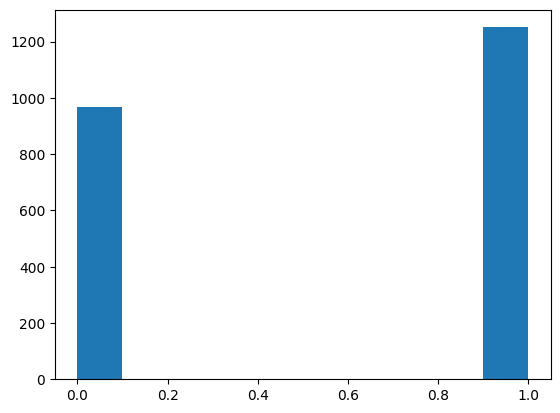

In [44]:
import matplotlib.pyplot as plt 
plt.hist(df["HeartDisease"])

In [45]:
df = pd.get_dummies(df, columns=['ChestPainType'])
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3
0,40,1,140,289,0,172,0,0,False,True,False,False
1,49,0,160,180,0,156,0,1,False,False,True,False
2,37,1,130,283,0,98,0,0,False,True,False,False
3,48,0,138,214,0,108,1,1,False,False,False,True
4,54,1,150,195,0,122,0,0,False,False,True,False


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    # 'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    # 'XGBoost': XGBClassifier(),
    # 'LightGBM': LGBMClassifier(),
    # 'CatBoost': CatBoostClassifier(silent=True),
    # 'GradientBoost':GradientBoostingClassifier(),
    # 'ExtraTrees':ExtraTreesClassifier()
}

# Train and test each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    print(f'{name} test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')
    
    # val_predictions = clf.predict(X_val)
    # val_accuracy = accuracy_score(y_val, val_predictions)
    # val_precision = precision_score(y_val, val_predictions)
    # val_recall = recall_score(y_val, val_predictions)
    # val_f1 = f1_score(y_val, val_predictions)
    # print(f'{name} validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}')



Logistic Regression test Accuracy: 0.7657657657657657, Precision: 0.7785977859778598, Recall: 0.8274509803921568, F1 Score: 0.8022813688212928


/home/himanshu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
print(classifiers['Logistic Regression'].intercept_[0])

-3.8116775366230846


In [48]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split


# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')
# X_test = X_test.astype('float32')
# y_test = y_test.astype('float32')
# # Define the model architecture
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # adjust this according to your problem
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # adjust this according to your problem

# # Define the checkpoint callback
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

# # Train the model
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[checkpoint_cb])

# # Evaluate the model on the train set
# train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
# print('\nTrain accuracy:', train_acc)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# print('\nTest accuracy:', test_acc)


In [49]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
X_train=X_train.astype('int')
X_test=X_test.astype('int')
X_val=X_val.astype('int')
def objective(trial):
    param = {
        'iterations' : trial.suggest_int('iterations', 50, 300),
        'depth' : trial.suggest_int('depth', 4, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'random_strength' : trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature' : trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' : trial.suggest_int('od_wait', 10, 50)
    }
    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-08-27 23:02:52,313] A new study created in memory with name: no-name-418fc027-27e4-4a00-981e-9bfc9c06ac72
[I 2024-08-27 23:02:52,623] Trial 0 finished with value: 0.8019332220741254 and parameters: {'iterations': 271, 'depth': 5, 'learning_rate': 0.1873746895605732, 'random_strength': 67, 'bagging_temperature': 1.147724617085714, 'od_type': 'Iter', 'od_wait': 14}. Best is trial 0 with value: 0.8019332220741254.
[I 2024-08-27 23:02:52,694] Trial 1 finished with value: 0.7686873584506086 and parameters: {'iterations': 82, 'depth': 7, 'learning_rate': 0.02414903656927016, 'random_strength': 20, 'bagging_temperature': 0.06189022665910092, 'od_type': 'IncToDec', 'od_wait': 39}. Best is trial 0 with value: 0.8019332220741254.
[I 2024-08-27 23:02:52,812] Trial 2 finished with value: 0.7812964543490859 and parameters: {'iterations': 119, 'depth': 8, 'learning_rate': 0.06794662389830956, 'random_strength': 51, 'bagging_temperature': 55.42067726712492, 'od_type': 'IncToDec', 'od_wait': 4

Model Accuracy: 0.819820
Model F1 Score: 0.820251
Validation Accuracy: 0.808081
Validation F1 Score: 0.808199


In [50]:
best_model.save_model("CB",format="cbm")

In [51]:
# import optuna
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score

# def objective(trial):
#     param = {
#         'C': trial.suggest_float('C', 1e-5, 100,log=True),
#         'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
#         # 'penalty': trial.suggest_categorical('penalty', ['l2','none']),
#         'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
#         'max_iter': trial.suggest_int('max_iter', 50, 200),
#         'tol': trial.suggest_float('tol', 1e-5, 1e-1),
#         'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
#         'warm_start': trial.suggest_categorical('warm_start', [True, False]),
#         'l1_ratio': trial.suggest_float('l1_ratio', 0, 1)
#     }
#     model = LogisticRegression(**param)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     accuracy = f1_score(y_test, preds, average='weighted')
#     return accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# # Best hyperparameters
# best_params = study.best_params

# # Fit the model with best hyperparameters
# best_model = LogisticRegression(**best_params)
# best_model.fit(X_train, y_train)

# # Make predictions 
# preds = best_model.predict(X_test)

# # Check the accuracy and F1 score of the model
# print("Model Accuracy: %f" % accuracy_score(y_test, preds))
# print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# # Now let's use the model with the best parameters on the validation set
# val_preds = best_model.predict(X_val)

# # Check the accuracy and F1 score of the best model on the validation set
# print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
# print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


In [52]:
# import pickle

# pickle.dump(best_model, open("LR", 'wb'))

In [53]:
# import optuna
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, f1_score

# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1,log=True),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#     }
#     model = GradientBoostingClassifier(**param)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     accuracy = f1_score(y_test, preds,average="weighted")
#     return accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# # Best hyperparameters
# best_params = study.best_params

# # Fit the model with best hyperparameters
# best_model = GradientBoostingClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Make predictions 
# preds = best_model.predict(X_test)

# # Check the accuracy and F1 score of the model
# print("Model Accuracy: %f" % accuracy_score(y_test, preds))
# print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# # Now let's use the model with the best parameters on the validation set
# val_preds = best_model.predict(X_val)

# # Check the accuracy and F1 score of the best model on the validation set
# print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
# print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


In [54]:
# pickle.dump(best_model, open("GB", 'wb'))

In [55]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score

# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
#         'max_depth': trial.suggest_int('max_depth', 2, 32),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
#         'max_features': trial.suggest_int('max_features', 1,1500),
#         'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     }
#     model = RandomForestClassifier(**param)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_val)
#     accuracy = f1_score(y_val, preds,average="weighted")
#     return accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Best hyperparameters
# best_params = study.best_params

# # Fit the model with best hyperparameters
# best_model = RandomForestClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Make predictions 
# preds = best_model.predict(X_test)

# # Check the accuracy and F1 score of the model
# print("Model Accuracy: %f" % accuracy_score(y_test, preds))
# print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


In [56]:
# pickle.dump(best_model, open("RF", 'wb'))

In [57]:
from tabnanny import verbose
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 1,log=True),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = LGBMClassifier(**param,verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-08-27 23:05:23,510] A new study created in memory with name: no-name-b9f3a06c-3742-489a-b638-1557e66f681d
/tmp/ipykernel_10535/388030165.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
/tmp/ipykernel_10535/388030165.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
[I 2024-08-27 23:05:23,662] Trial 0 finished with value: 0.6973413232994226 and parameters: {'num_leaves': 43, 'max_depth': 12, 'learning_rate': 0.4217071834120926, 'n_estimators': 436, 'min_child_samples': 100, 'min_child_weigh

Model Accuracy: 0.788288
Model F1 Score: 0.788560


In [59]:
import pickle

In [60]:
pickle.dump(best_model, open("LGBM", 'wb'))

In [61]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    model = ExtraTreesClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-08-27 23:10:09,392] A new study created in memory with name: no-name-75e8e637-9251-42bc-b672-95caaf4229c2
[I 2024-08-27 23:10:10,686] Trial 0 finished with value: 0.7721714220182413 and parameters: {'n_estimators': 1246, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.7721714220182413.
[I 2024-08-27 23:10:11,950] Trial 1 finished with value: 0.762315172799562 and parameters: {'n_estimators': 1327, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7721714220182413.
[I 2024-08-27 23:10:12,989] Trial 2 finished with value: 0.7472672706317566 and parameters: {'n_estimators': 906, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.7721714220182413.
[I 2024-0

Model Accuracy: 0.799550
Model F1 Score: 0.799016


In [62]:
pickle.dump(best_model, open("ET", 'wb'))

In [63]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-08-27 23:18:29,416] A new study created in memory with name: no-name-d41010e2-ec53-49ba-a3d4-3e4be4dae077
[I 2024-08-27 23:18:31,007] Trial 0 finished with value: 0.37333864965443914 and parameters: {'n_estimators': 106, 'max_depth': 20, 'learning_rate': 1.5685827752456352e-08, 'gamma': 0.408432472038625, 'min_child_weight': 4, 'subsample': 0.9, 'colsample_bytree': 0.5, 'reg_alpha': 0.08229015767816332, 'reg_lambda': 0.0001866453026785666}. Best is trial 0 with value: 0.37333864965443914.
[I 2024-08-27 23:18:31,481] Trial 1 finished with value: 0.7628992943002604 and parameters: {'n_estimators': 827, 'max_depth': 19, 'learning_rate': 0.05510617903293921, 'gamma': 0.9875394416649159, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.5, 'reg_alpha': 0.07992397650398399, 'reg_lambda': 0.00013991262499769724}. Best is trial 1 with value: 0.7628992943002604.
[I 2024-08-27 23:18:32,085] Trial 2 finished with value: 0.37333864965443914 and parameters: {'n_estimators': 675

Model Accuracy: 0.790541
Model F1 Score: 0.791364


In [64]:
pickle.dump(best_model, open("XGB", 'wb'))

In [65]:
import pickle

In [66]:

lgbm=pickle.load(open("LGBM", 'rb'))
et=pickle.load(open("ET", 'rb'))
xgb=pickle.load(open("XGB", 'rb'))


In [67]:
cb=CatBoostClassifier()
cb.load_model("CB")


In [68]:
p1=cb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=cb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=lgbm.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=lgbm.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=et.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=et.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=xgb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=xgb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

0.8079628853822403


0.8193883663404543


0.8129735292696171


0.7880166551917064


0.7833594290613574


0.8000835768800442


0.8230292923878774


0.7897168507855532




In [69]:
from scipy.optimize import minimize
from sklearn.metrics import f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack predictions
preds = np.vstack([preds_cb, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# The algorithm needs a starting value, let's start with equal weights
starting_values = [1/len(preds)]*len(preds)

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*len(preds)

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# We use 'SLSQP' as our solver, SLSQP stands for Sequential Least Squares Programming
res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensemble Weights: {weights}'.format(weights=res['x']))

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Get the predictions from each model on the test set
preds_cb = cb.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack the predictions together
preds = np.vstack([preds_cb, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))



Ensemble Weights: [0.24992095 0.24992098 0.2498877  0.25027037]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        92
           1       0.86      0.80      0.83       106

    accuracy                           0.82       198
   macro avg       0.82      0.82      0.82       198
weighted avg       0.83      0.82      0.82       198

Precision: 0.858586
Recall: 0.801887
F1 Score: 0.829268


In [70]:
preds_cb = cb.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.79      0.85      0.82        92
           1       0.86      0.80      0.83       106

    accuracy                           0.82       198
   macro avg       0.82      0.82      0.82       198
weighted avg       0.83      0.82      0.82       198

Precision: 0.858586
Recall: 0.801887
F1 Score: 0.829268


In [71]:
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack predictions
preds = np.vstack([preds_cb, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    # Convert probabilities to class labels
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*7

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# Number of random starting points
num_starts = 10

best_score = np.inf
best_weights = None

# Perform optimization with several randomly chosen starting points
for _ in range(num_starts):
    # Randomly choose starting weights
    values = np.random.rand(len(preds))
    starting_values = values / np.sum(values)

    res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

    if res.fun < best_score:
        best_score = res.fun
        best_weights = res.x

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

print('Best Ensemble Weights: {weights}'.format(weights=best_weights))

print(classification_report(y_test, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_test, final_preds))
print("Recall: %f" % recall_score(y_test, final_preds))
print("F1 Score: %f" % f1_score(y_test, final_preds))


ValueError: The number of bounds is not compatible with the length of `x0`.

In [ ]:
preds_cb = cb.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83        93
           1       0.88      0.87      0.88       129

    accuracy                           0.86       222
   macro avg       0.85      0.85      0.85       222
weighted avg       0.86      0.86      0.86       222

Precision: 0.881890
Recall: 0.868217
F1 Score: 0.875000


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = [cb, lgbm,et,xgb]
model_names = ['cb', 'lgbm','et','xgb']

# Get the predictions from each model on the validation set
preds = [model.predict(X_val) for model in models]

# Calculate Disagreement Measure and Correlation of Errors
for i in range(len(models)):
    for j in range(i+1, len(models)):
        # Disagreement Measure
        disagree = np.mean(preds[i] != preds[j])
        print(f'Disagreement Measure between {model_names[i]} and {model_names[j]}: {disagree}')
        
        # Correlation of Errors
        errors_i = preds[i] != y_val
        errors_j = preds[j] != y_val
        correlation = np.corrcoef(errors_i, errors_j)[0, 1]
        print(f'Correlation of Errors between {model_names[i]} and {model_names[j]}: {correlation}')


Disagreement Measure between cb and lr: 0.14864864864864866
Correlation of Errors between cb and lr: 0.5552065852268625
Disagreement Measure between cb and gb: 0.05405405405405406
Correlation of Errors between cb and gb: 0.8174381543181655
Disagreement Measure between cb and rf: 0.07657657657657657
Correlation of Errors between cb and rf: 0.7383313890293738
Disagreement Measure between cb and lgbm: 0.06756756756756757
Correlation of Errors between cb and lgbm: 0.7603083947786671
Disagreement Measure between cb and et: 0.06306306306306306
Correlation of Errors between cb and et: 0.7747352037273628
Disagreement Measure between cb and xgb: 0.05855855855855856
Correlation of Errors between cb and xgb: 0.7897266244040544
Disagreement Measure between lr and gb: 0.11261261261261261
Correlation of Errors between lr and gb: 0.6686845784267827
Disagreement Measure between lr and rf: 0.16216216216216217
Correlation of Errors between lr and rf: 0.5155712693484107
Disagreement Measure between lr an